# ML KNN
Implementation for k-nearest neighbor, k-NN. <br/>
Alogrithm:<br/>
Input: training set:<br/>
$$ T = {(x_1, y_1),(x_2, y_2,...,(x_N, y_N)} $$<br/>
$x_i \in \chi\in R^n$ is feature vector. <br/>
$y_i \in y \in \{c_1, c_2, c_K\}$ is the type of the samples.<br/>
$i = 1,2, ..., N$<br/>
Output: class y for sample x<br/>

(1) According to the distance metrix, find the nearest k point for the samples in traning set T with x.  It build $N_k(x)$. For example: <br/>
$$L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}$$
(2) In  $N_k(x)$ decide the class y according to the strategy (e.g. Majority voting).<br/>
$$y = arg max_{c_j} \sum_{x_j \in N_k(x)} I(y_i = c_j)$$
$$i = 1,2, ... , N; j = 1,2,.., K$$
$I$ is indicator function, $I = 1$ if $y_i = c_i$, else $I = 0$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
%matplotlib inline

In [2]:
# define distance metrix
def distance(x, y, p=2):
    try:
        dis = np.power(np.sum(np.power(np.abs((x - y)), p), 1), 1/p)
    except:
        dis = np.power(np.sum(np.power(np.abs((x - y)), p)), 1/p)

    return dis

In [3]:
# Load test data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["label"] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


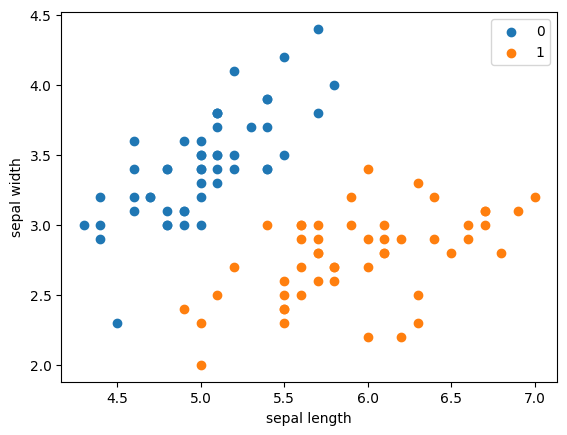

In [5]:
# plot dataset
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
# build tranning data
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2)

In [8]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=1, p=2):
        """
        n_neighbors: k
        p: type of distance
        """
        self.k = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        diss = distance(self.X_train, X, self.p)
        diss_idx = np.argsort(diss) # return sorted index
        top_k_idx = diss_idx[:self.k]
        top_k_diss = diss[top_k_idx]
        top_k_points = self.X_train[top_k_idx]
        top_k_y = self.y_train[top_k_idx]
        counter = Counter(top_k_y)
        label = counter.most_common()[0][0]
        return label, top_k_points, top_k_diss

    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)[0]
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [15]:
clf = KNN(X_train, y_train)

In [18]:
clf.score(X_test, y_test)

0.95

In [19]:
# test for single point
test_point = [6, 2.7]
clf.predict(test_point)

(1.0, array([[6.1, 2.8]]), array([0.14142136]))

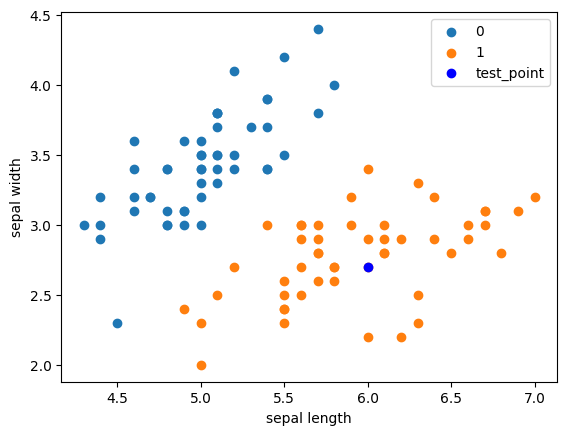

In [23]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## Implementation by sklearn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
clf_sk.score(X_test, y_test)

1.0